In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("/content/USDCOP=X.csv",index_col=0,parse_dates=True)

In [4]:
ts = df["Adj Close"]

In [5]:
ts["2023-01-08"].plot()

KeyError: ignored

In [13]:
df=pd.DataFrame(df)
df.index = ts.index
df["t"] = ts.values
df["t-1"] = ts.shift(1)
df["t-2"] = ts.shift(2)
df["t-3"] = ts.shift(3)

In [14]:
df

,Open,High,Low,Close,Adj Close,Volume,t,t-1,t-2,t-3
Date,,,,,,,,,,
2022-10-25,4988.250000,4988.250000,4915.390137,4988.250000,4988.250000,0,4988.250000,NaN,NaN,NaN
2022-10-26,4973.450195,4985.100098,4877.759766,4973.450195,4973.450195,0,4973.450195,4988.250000,NaN,NaN
2022-10-27,4882.319824,4884.720215,4802.259766,4882.319824,4882.319824,0,4882.319824,4973.450195,4988.250000,NaN
2022-10-28,4798.259766,4849.379883,4753.152344,4798.259766,4798.259766,0,4798.259766,4882.319824,4973.450195,4988.250000
2022-10-31,4833.259766,4903.709961,4831.649902,4833.259766,4833.259766,0,4833.259766,4798.259766,4882.319824,4973.450195
...,...,...,...,...,...,...,...,...,...,...
2023-10-19,4248.250000,4270.770020,4237.250000,4248.250000,4248.250000,0,4248.250000,4196.729980,4239.250000,4235.250000
2023-10-20,4257.750000,4259.879883,4220.979980,4257.750000,4257.750000,0,4257.750000,4248.250000,4196.729980,4239.250000
2023-10-23,4234.250000,4242.250000,4206.839844,4234.250000,4234.250000,0,4234.250000,4257.750000,4248.250000,4196.729980


una señal de ruido blanco es:
La media constante
la varianza es constante
No hay autocorrelaciones (consigo misma en tiempo pasados)

In [15]:
#Estos son los coeficientes de pearson para saber si hay corr
df2 = df[{'t','t-1','t-2','t-3'}]
df2.corr()

<ipython-input-15-b515de63d332>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df2 = df[{'t','t-1','t-2','t-3'}]


,t-2,t-1,t,t-3
t-2,1.000000,0.989535,0.978515,0.989518
t-1,0.989535,1.000000,0.989555,0.978491
t,0.978515,0.989555,1.000000,0.966896
t-3,0.989518,0.978491,0.966896,1.000000


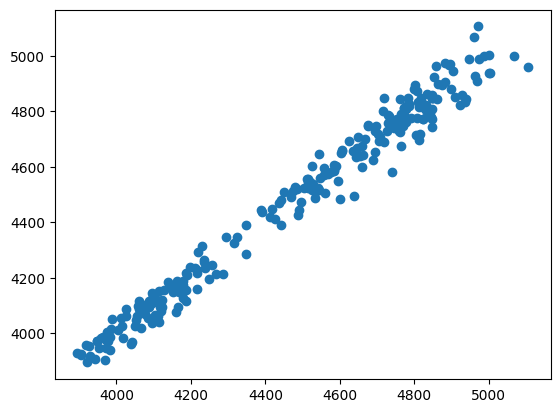

In [20]:
plt.scatter(df["t"],df["t-1"])

In [21]:
medianov = ts['2023-01-05':'2023-11-05'].mean()
medianov

4384.381844061904

<Axes: xlabel='Date'>

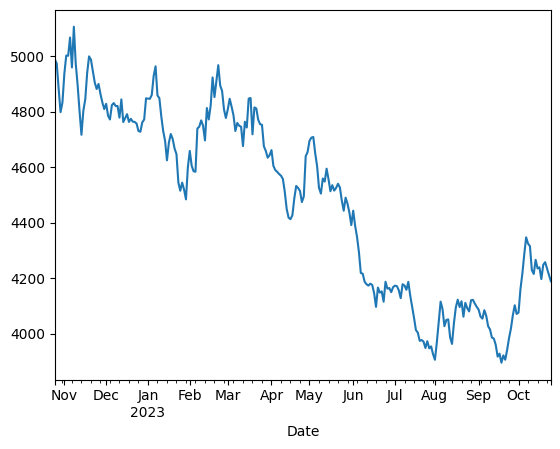

In [23]:
ts.plot()

In [26]:
np.random.seed(123)
t = np.arange(0,7,0.01)
s = 2* np.sin(2*np.pi*t) + np.random.normal(0,2,len(t))

ts = pd.Series(data = s, index = t)

(0.0, 3.0)

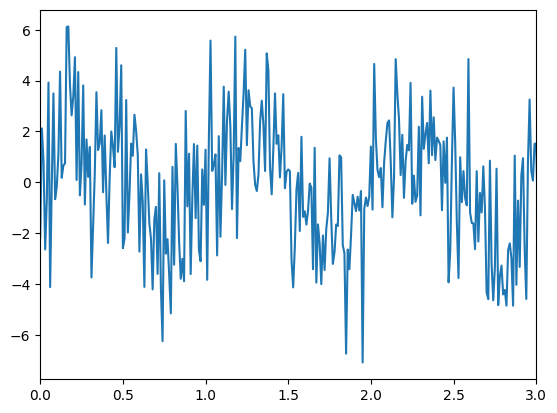

In [35]:
ts.plot()
plt.xlim(0,3)


In [38]:
df=pd.DataFrame(ts)
df.index = ts.index
df["t"] = ts.values
df["t-1"] = ts.shift(1)
df["t-2"] = ts.shift(2)
df["t-3"] = ts.shift(3)

df.corr()

,0,t,t-1,t-2,t-3
0,1.000000,1.000000,0.331512,0.302190,0.315315
t,1.000000,1.000000,0.331512,0.302190,0.315315
t-1,0.331512,0.331512,1.000000,0.331111,0.303349
t-2,0.302190,0.302190,0.331111,1.000000,0.332034
t-3,0.315315,0.315315,0.303349,0.332034,1.000000


In [42]:
print(np.sqrt(ts['0.00':'0.75'].std()))
print(np.sqrt(ts['0.75':'1.50'].std()))
print(np.sqrt(ts['1.50':'2.20'].std()))
print(np.sqrt(ts['2.20':'2.95'].std()))
print(np.sqrt(ts['2.95':'3.7'].std()))
print(np.sqrt(ts['3.7':'4.45'].std()))

1.6173702525275602
1.5745025829898638
1.4900226589674377
1.5731807738232944
1.503139728934271
1.5867825581176171


In [44]:
print(ts['0.00':'0.75'].mean())
print(ts['0.75':'1.50'].mean())
print(ts['1.50':'2.20'].mean())
print(ts['2.20':'2.95'].mean())
print(ts['2.95':'3.7'].mean())
print(ts['3.7':'4.45'].mean())

0.5533091751193367
0.5557814522794944
-0.7682921784766815
-0.6735090784399044
0.3752898612622621
0.06101343484944283


Es posible ruido blanco pq tiene matices del comportamiento per oa ciencia cierta no se sabe si cumple a cabalidad pues tiene correlacion debil